# Initialize Environment

1. Import Dependencies
2. Define Program Functions

In [ ]:
import pandas as pd
import ast
from pandas import DataFrame

def unique(list1):
  # this function takes a list1 and returns a list2 with
  # unique elements of list 

  list_set = set(list1) 
  unique_list = (list(list_set))
  return unique_list

def wordsInSequence(sequence, treeLevel):
  # takes a genetic sequence and a treeLevel (word length) and returns
  # a list with words in that sequence

  length = len(sequence)
  max_possible_words_in_sequence = length-(treeLevel-1)
  wordList = []
  for i in range(max_possible_words_in_sequence):
    wordList.append(sequence[0+i:treeLevel+i])
  return wordList

def findComplexity(sequence, treeLevel, complexity_threshold):
  # takes a genetic sequence and calculates the linguistic complexity 
  # for that sequence for word length treeLevel

  wordList = wordsInSequence(sequence,treeLevel)
  wordList = unique(wordList)

  if len(sequence) > 4**treeLevel:
    complexity = len(wordList)/(4**treeLevel)
  else:
    complexity = len(wordList)/(len(sequence)-(treeLevel-1))

  if (complexity < complexity_threshold) & (complexity > 0.2):
    print("Complexity at tree level " + str(treeLevel) + " is " + str(complexity) + " for sequence: "+str(sequence))

  return ([complexity, treeLevel, sequence])

def movingWindow(sequence, treeLevel=8, chunkSize=20, complexity_threshold = 0.2, showGraph = False):
  # takes a genetic sequence and calculates the linguistic complexity scores
  # for windows of size chunkSize for word lengths from 1 to treeLevel.
  # returns the lowest score window in format:  
  # [Boolean, [complexity, treeLevel, sequence]] where Boolean denotes if the
  # complexity score is lower (True) than complexity_threshold
  # optional: draw the complexity graph for the length of the sequence 
  # by setting showGraph = True

  complexityList=[]

  for i in range(1, treeLevel+1):
    for chunk in range(len(sequence)-(chunkSize-1)):

      chunkSeq = sequence[chunk:(chunk+chunkSize)]
      complexityList.append(findComplexity(chunkSeq, i, complexity_threshold))

  lowest=min(complexityList, key=lambda x: x[0])

  #print(complexityList)

  lowLvl=lowest[1]

  if showGraph:
    df = DataFrame(complexityList,columns=['complexity','tree','sequence'])
    df = df[['complexity','tree']]
    ax = df[df.tree == lowLvl].filter(items=["complexity"]).plot(fontsize=15, grid=True, figsize=(20,8))
    ax.axhline(complexity_threshold, color="red", linestyle="--")
    ax.axhline(1, color="green", linestyle="--")
    ax.set_ylim(ymin=0)
    ax.set_title(lowest[2])

  if lowest[0] < complexity_threshold:
    return([True, lowest])
  else:
    return ([False, lowest])

def createLogFile(seqlist, filename, complexity_threshold = 0.2, chunkSize=20):
  # takes a list of sequences for analysis, the name of the output file,
  # complexity threshold, and windowsize (chunkSize), and outputs a log file
  # with lowesst complexity score for each sequence
  outputf = open(filename, "w")
  truemmbir = 0
  for i in seqlist:
    seqScore = movingWindow(i, complexity_threshold = complexity_threshold, chunkSize = chunkSize)
    if seqScore[0] == False:
      truemmbir += 1
    outputf.write(str(seqScore[1])+"\n")
  print("sequences above threshold:", truemmbir)

  outputf.close()

def createSequenceList(filename):
  # takes a filename and extracts sequences from it, and outputs them to a list
  # has some checking (all sequences shorter than 100bp will be discarted)
  seqfile = open(filename, "r")
  lines = seqfile.readlines()
  seqlist=[]
  for line in lines:
    if "bir:" in line:
      if len(line) > 100:
        seqlist.append(line.strip("\n").strip("bir:-"))
  seqlist = list(dict.fromkeys(seqlist))
  print(len(seqlist))

  longseq=0
  for i in seqlist:
    if len(i) > 300:
      longseq+=1
  print(longseq)

  return seqlist

def createDataFrameFromLogFile(logfile):
  # creates a pandas dataframe out of the complexity scores log file
  logfile = open(logfile, "r")
  lines = logfile.readlines()
  loglist=[]
  for line in lines:
    if "[" in line:
        loglist.append(line.strip("\n"))

  loglist2=[]
  for i in range(len(loglist)):
    loglist[i] = ast.literal_eval(loglist[i]) 
  print("total sequences:", len(loglist))

  df = DataFrame(loglist,columns=['complexity', 'level', 'sequence'])
  
  return df

# Test

In [ ]:
sequence = "GTTCTAGGGTACATGTGTACAATGTGCAGGTTTGTTACATATGTATACTTGTGCCATGTTGGTGTGCTGCACCCATTAACTCGTCATTTACATTAGGTATATCCCCTAATGGTGTGGGGGGGGGGGGGGGGCACCCCACAACAGGCCCCAGTGTGTGATGTTCCCCTTACTGTGTCCAAGTGTTCTCATTGTTCAAATCCAAACAATGAGTGAGAACAAGC"
print(len(sequence))

movingWindow(sequence, treeLevel=7, chunkSize=20, complexity_threshold = 0.3, showGraph = True)

Input Files Entry:

In [ ]:
seqList_mmbir = createSequenceList("/content/srr23.txt") #/content/UNC_birlocs.txt
seqList_other = createSequenceList("/content/srr23_all.txt") #/content/TestSetOTHER.txt

201
32
49
12


Set Up Complexity Threshold &

Window Size &

Run the Complexity Program &

Create Log Files &

Create the Dataframes for Graphing

In [ ]:
createLogFile(seqList_mmbir, "testMMBIR_log.txt", complexity_threshold = 0.2, chunkSize=20)
createLogFile(seqList_other, "testOTHER_log.txt", complexity_threshold = 0.2, chunkSize=20)

df_mmbir = createDataFrameFromLogFile("/content/testMMBIR_log.txt")
df_other = createDataFrameFromLogFile("/content/testOTHER_log.txt")

sequences above threshold: 134
sequences above threshold: 30
total sequences: 201
total sequences: 49


Calculate the filtering efficiency given threshold1

In [ ]:
threshold1 = 0.3
threshold2 = 0.2

mmbir_len = len(df_mmbir)
other_len = len(df_other)

df1 = df_mmbir[df_mmbir.complexity > threshold1]
print("mmbir events % left:", len(df1)/mmbir_len, "or", len(df1), "total")

df1 = df_other[df_other.complexity > threshold1]
print("other events % left:", len(df1)/other_len, "or", len(df1), "total")

mmbir events % left: 0.4577114427860697 or 92 total
other events % left: 0.4897959183673469 or 24 total


Join Two Datasets Together

In [ ]:
df_mmbir = df_mmbir.rename(columns={"complexity": "complexity_mmbir"})
df_other = df_other.rename(columns={"complexity": "complexity_other"})
df_mmbir = df_mmbir[["complexity_mmbir"]]
df_other = df_other[["complexity_other"]]
df_mmbir = df_mmbir.join(df_other)
df = df_mmbir

Create a Visualization

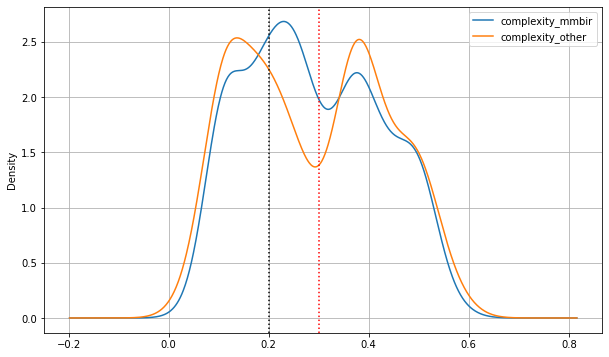

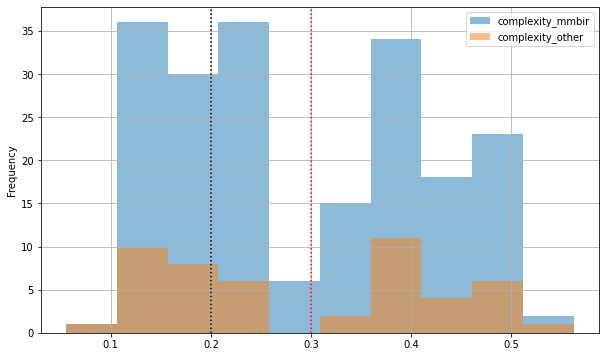

In [ ]:
#df = df.dropna()

ax = df.plot.kde(figsize = (10,6), grid=True, bw_method=0.3)
ax.axvline(threshold1, color="red", linestyle=":")
ax.axvline(threshold2, color="black", linestyle=":")

ax = df.plot.hist(alpha=0.5, figsize = (10,6), grid = True)
ax.axvline(threshold1, color="red", linestyle=":")
ax.axvline(threshold2, color="black", linestyle=":")

In [ ]:
seqlist = createSequenceList("/content/p53KO-C5.txt")
for seq in seqlist:
  print(seq)
for i in seqlist:
  movingWindow(i, treeLevel=8, chunkSize=20, complexity_threshold = 0.2, showGraph = True)

In [ ]:
!pip install seq-tools
import seqtools.sequence.kmer as kmer

def stats(sequence, k=3, square=True):
    """Returns the complexity score along with the number of unique kmers"""
    kfreq = kmer.frequency(sequence, k)
    if square:
        score = sum([(x - 1)**2 for x in kfreq.values()])
    else:
        score = sum([(x - 1) for x in kfreq.values()])
    return (score, len(kfreq))

def score(sequence, k=3, square=True):
    stats(sequence, k, square)[0]

def max_score(sequence, k=3, square=True):
    ans = len(sequence) - k
    if square:
        ans = ans ** 2
    return ans


In [ ]:
seqList_mmbir = createSequenceList("/content/PolQKOR5C1.txt")
createLogFile(seqList_mmbir, "testMMBIR_log.txt", complexity_threshold = 0.3, chunkSize=20)
df_mmbir = createDataFrameFromLogFile("/content/testMMBIR_log.txt")


In [ ]:
def countInsertionLengths(filename):
  # takes a filename and extracts sequences from it, and outputs them to a list
  # has some checking (all sequences shorter than 100bp will be discarted)
  seqfile = open(filename, "r")
  lines = seqfile.readlines()
  insertionlist=[]
  dir=""
  for line in lines:
    if ">" in line:
      dir = line.strip(">").strip()
    if "Microhomology" in line:
      line = line.strip("Microhomology Insertion :").strip()
      insertionlist.append([dir,line])
  print(len(insertionlist))

  return insertionlist

inslist = countInsertionLengths("/content/UNC_insertions.txt")
df = DataFrame(inslist,columns=['sample', 'sequence'])

In [ ]:
import seaborn as sns
df["length"] = df.sequence.str.len()
df = df[['sample', 'length']]
newdf = df.groupby('sample').mean()

In [ ]:
print(newdf)
sns.distplot(data=newdf, x="sample")